### Reading Date


In [188]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [189]:
df = pd.read_csv('city_day.csv', encoding= 'unicode_escape')

In [190]:
df.shape

(29531, 16)

In [191]:
df.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [192]:
df.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         29531 non-null  object 
 1   Date         29531 non-null  object 
 2   PM2.5        24933 non-null  float64
 3   PM10         18391 non-null  float64
 4   NO           25949 non-null  float64
 5   NO2          25946 non-null  float64
 6   NOx          25346 non-null  float64
 7   NH3          19203 non-null  float64
 8   CO           27472 non-null  float64
 9   SO2          25677 non-null  float64
 10  O3           25509 non-null  float64
 11  Benzene      23908 non-null  float64
 12  Toluene      21490 non-null  float64
 13  Xylene       11422 non-null  float64
 14  AQI          24850 non-null  float64
 15  Air_quality  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


### Null Data

In [194]:
pd.isnull(df).sum()


City               0
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
Air_quality     4681
dtype: int64

In [195]:
df_new = df.dropna()

In [196]:
pd.isnull(df_new).sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
Air_quality    0
dtype: int64

In [197]:
print(df_new.shape)
print(df.shape)

print(df_new.shape[0]/df.shape[0])


(6236, 16)
(29531, 16)
0.21116792523111308


Nearly 80% of the data will be gone

### Handling Missing Data

In [198]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'Air_quality'],
      dtype='object')

In [199]:
df_numerical = df.select_dtypes(include=[float])

df_numerical.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [200]:
numeric_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene','AQI']


In [201]:
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

In [202]:
df.describe()

PM2.5          PM10           NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.00000  29531.000000  29531.000000   
mean      67.450578    118.127103     17.57473     28.560659     32.309123   
std       59.414476     71.500953     21.35922     22.941051     29.317936   
min        0.040000      0.010000      0.02000      0.010000      0.000000   
25%       32.150000     79.315000      6.21000     12.980000     14.670000   
50%       58.030000    118.127103     11.53000     25.240000     27.550000   
75%       72.450000    118.127103     17.57473     34.665000     36.015000   
max      949.990000   1000.000000    390.68000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       20.711370      6.715753     16.909088     20.163443     14.226364   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%       12.040000      0.540000      6.090000     20.740000      0.240000   
50%       23.483476      0.950000     10.480000     34.491430      1.840000   
75%       23.483476      1.710000     14.531977     42.730000      3.280840   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  29531.000000  29531.000000  29531.000000  
mean       8.700972      3.070128    166.463581  
std       17.034769      3.932426    129.064348  
min        0.000000      0.000000     13.000000  
25%        1.280000      2.000000     88.000000  
50%        6.930000      3.070128    138.000000  
75%        8.700972      3.070128    179.000000  
max      454.850000    170.370000   2049.000000

In [203]:
df_categorical = df.select_dtypes(include=[object])

df_categorical.columns

Index(['City', 'Date', 'Air_quality'], dtype='object')

In [204]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [205]:
df['City'].unique().shape

(26,)

In [206]:
df['Date'].unique().shape

(2009,)

In [207]:
df['Air_quality'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [208]:
pd.isnull(df).sum()

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI               0
Air_quality    4681
dtype: int64

### EDA

#### Date Wise

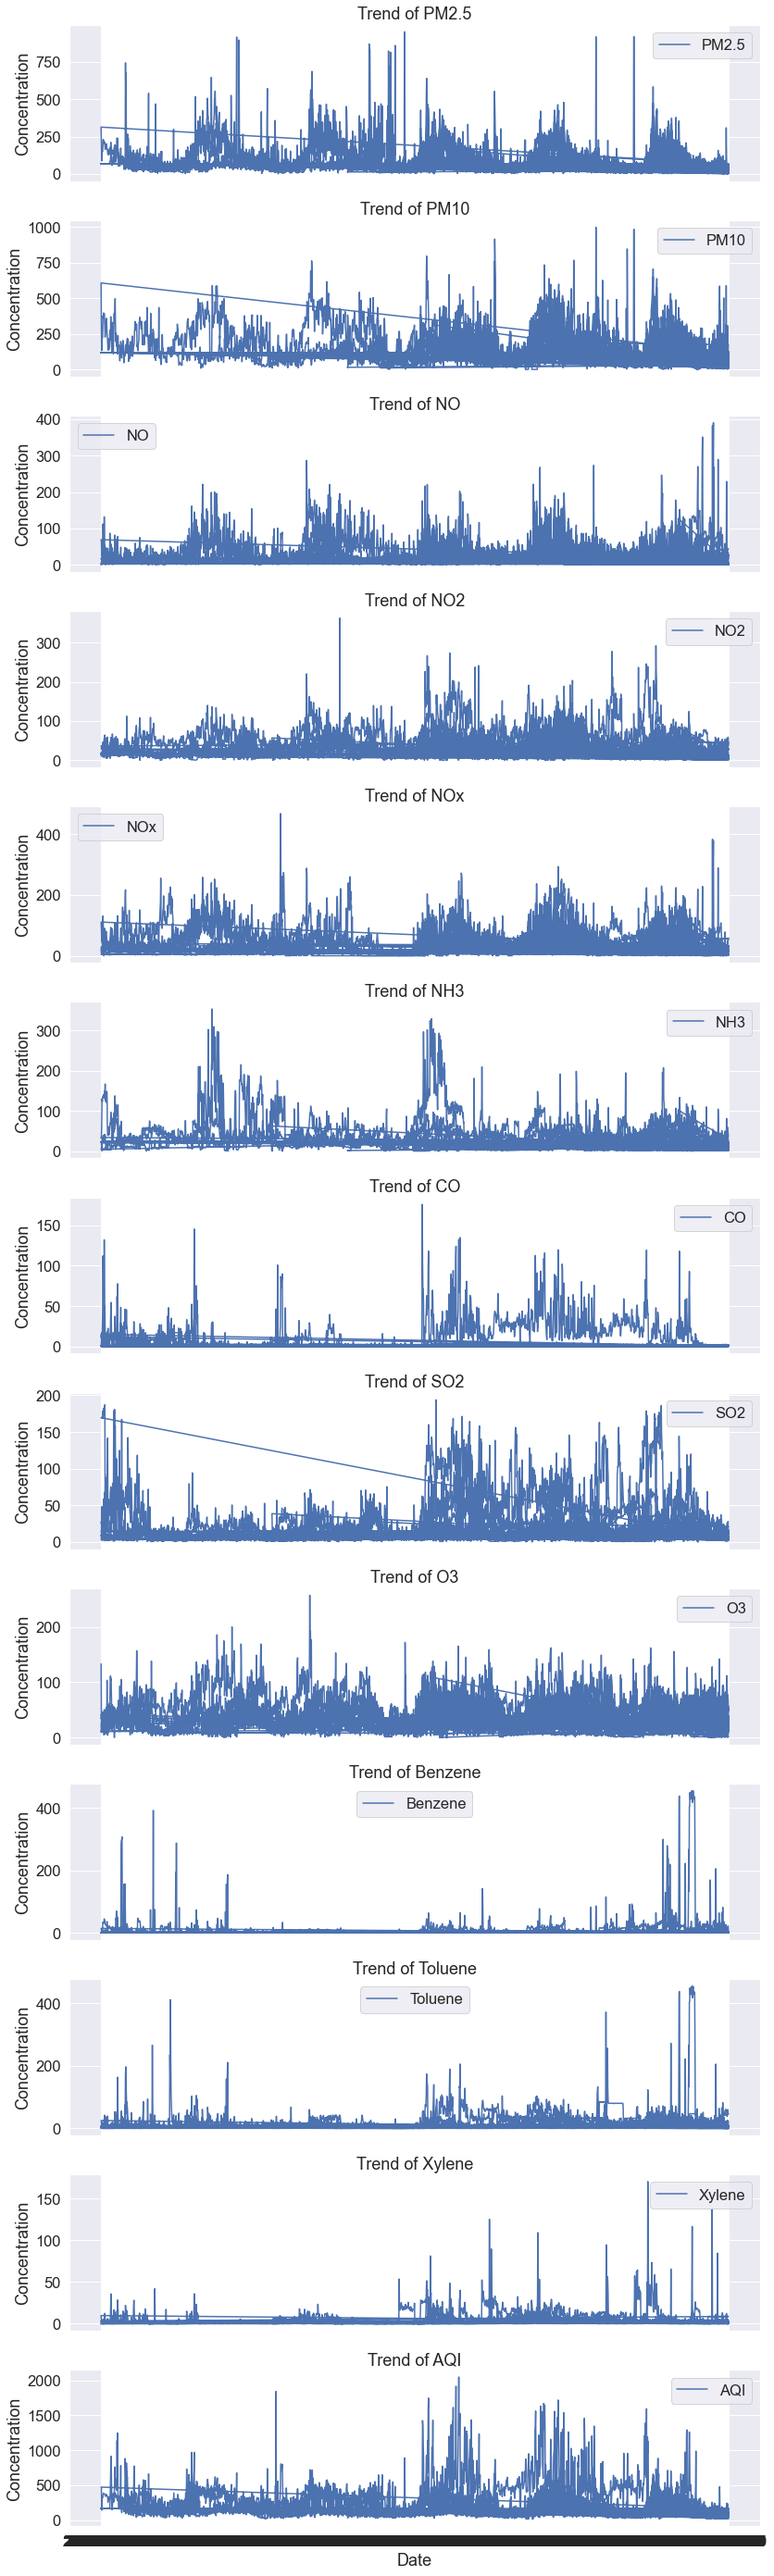

In [209]:
num_plots = len(numeric_cols)
fig, axes = plt.subplots(num_plots, 1, figsize=(12, num_plots * 3), sharex=True)


for i, pollutant in enumerate(numeric_cols):
    axes[i].plot(df['Date'], df[pollutant], label=pollutant)
    axes[i].set_title(f'Trend of {pollutant}')
    axes[i].set_ylabel('Concentration')
    axes[i].legend()
plt.xlabel('Date')
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()


This plot just shows the values but we can't come to any conclusions with this. And each plot include data of 26 cities on a same day.

#### City wise

In [210]:
city_wise_AQI = df[['City','AQI']].groupby(['City']).median().sort_values(['AQI']).reset_index()

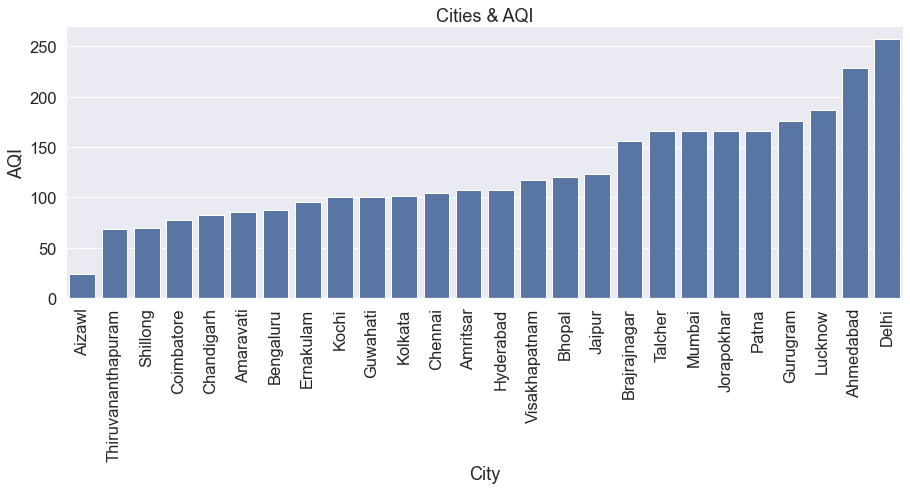

In [211]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=city_wise_AQI).set(title ='Cities & AQI')
plt.xticks(rotation=90)
plt.show()

From this we can say that: Aizwal has been the city with the best AQI and Delhi, Ahmedabad have very poor Air Quality indices.

#### City wise + Yearly

In [212]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [213]:
city_wise_with_YearlyData = df[['City','AQI','Year']].groupby(['City','Year']).median().sort_values(['AQI']).reset_index()

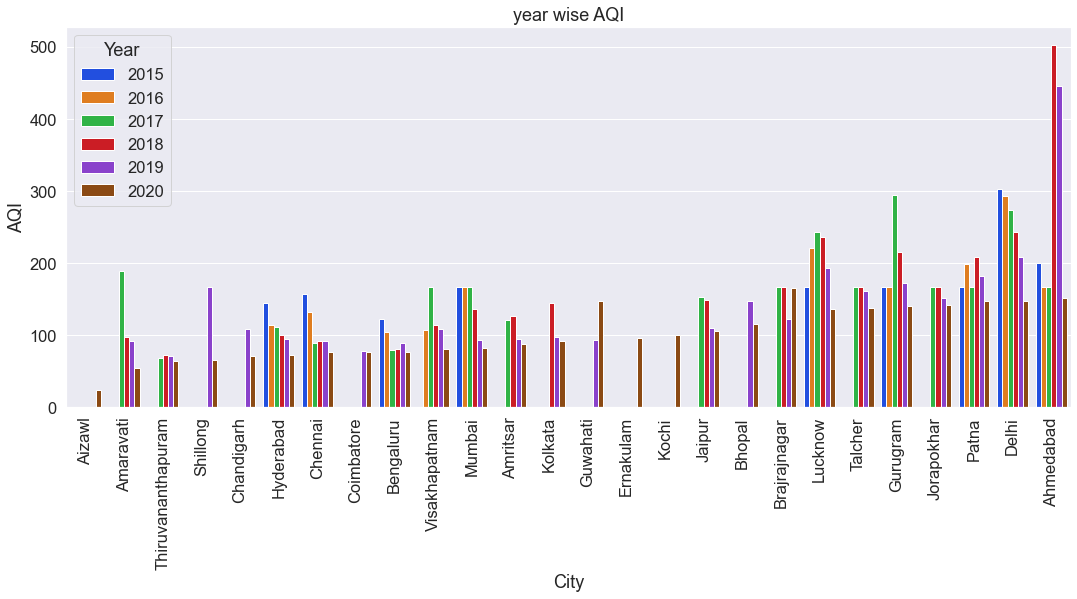

In [214]:
plt.figure(figsize=(18,7))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=city_wise_with_YearlyData,hue='Year',palette='bright').set(title ='year wise AQI')
plt.xticks(rotation=90)
plt.show()

Here we have 2 observations:
1. We don't have every year data for all the cities
2. A sudden spike in AQI for the city of Ahmedabad during 2018 & 2019.
   we tried to look for the reasons for such a sudden change : Power plant exhaust, Road dust and transport.

https://timesofindia.indiatimes.com/city/ahmedabad/posh-bopal/articleshow/72046417.cms

#### City wise + Monthly

In [215]:
month_wise = df.groupby(['City','Month']).agg(AQI = pd.NamedAgg(column = 'AQI',aggfunc = np.mean)).reset_index()

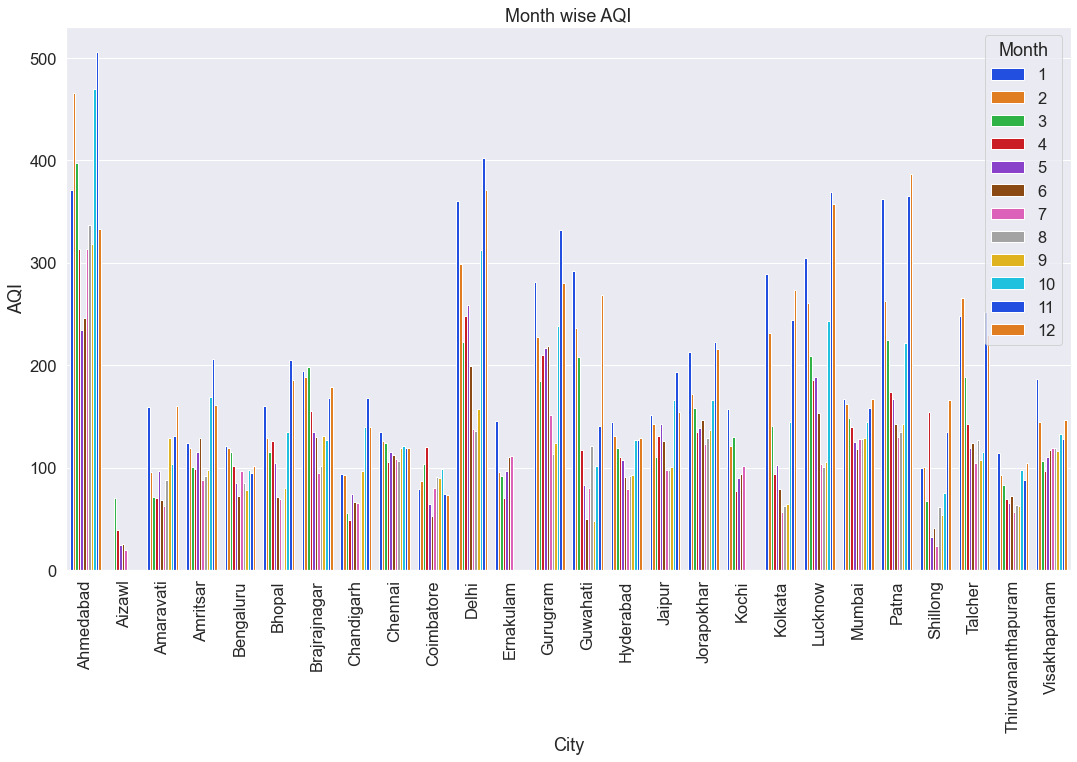

In [216]:
plt.figure(figsize=(18,10))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=month_wise,hue='Month',palette = 'bright').set(title ='Month wise AQI')
plt.xticks(rotation=90)
plt.show()

Here we can observe that in most of the cities there is a spike in AQI on Nov, Dec, Jan & Feb months

Reason : Winter Air Pollution

https://timesofindia.indiatimes.com/city/delhi/delhi-enters-red-zone-as-bad-air-quality-intensifies-citys-winter-dilemma/articleshow/114298236.cms

To have a better visualization of the above data

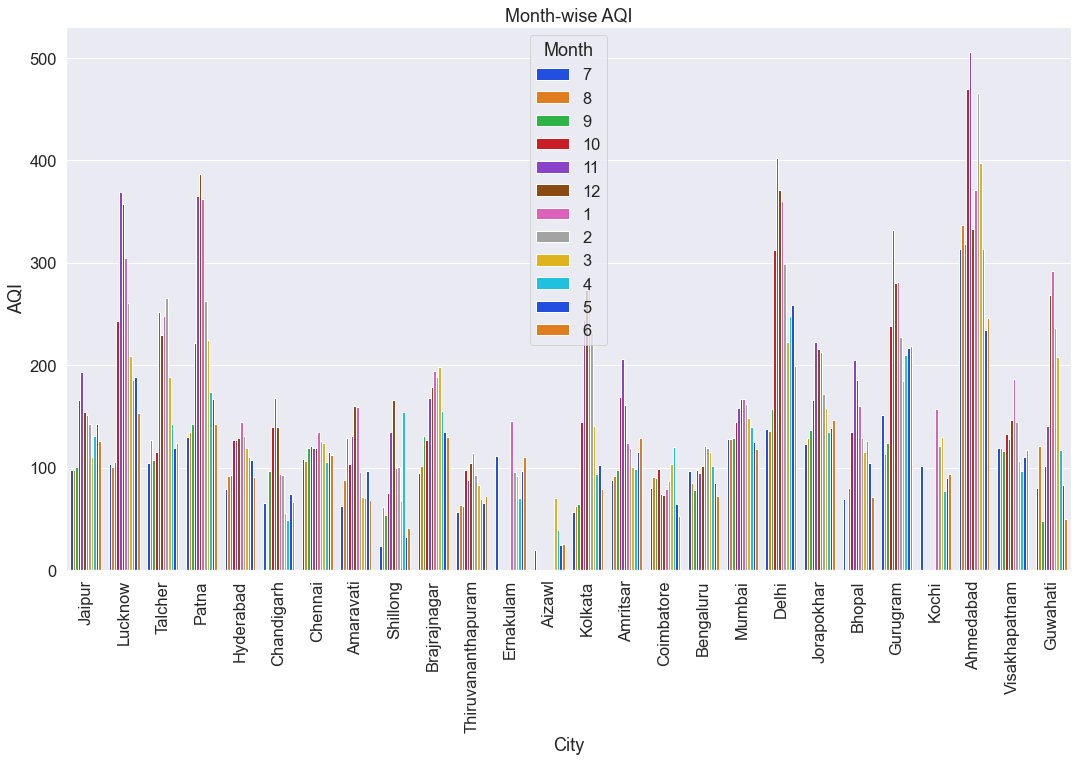

In [217]:
# custom_order = ['July', 'August', 'September', 'October', 'November', 'December', 
#                 'January', 'February', 'March', 'April', 'May', 'June']
custom_order = [7,8,9,10,11,12,1,2,3,4,5,6]
month_wise['Month'] = pd.Categorical(month_wise['Month'], categories=custom_order, ordered=True)

month_wise = month_wise.sort_values('Month')

# Plot
plt.figure(figsize=(18,10))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=month_wise, hue='Month', palette='bright', hue_order=custom_order)
plt.title('Month-wise AQI')
plt.xticks(rotation=90)
plt.show()


#### Box plot visualization of pollutants

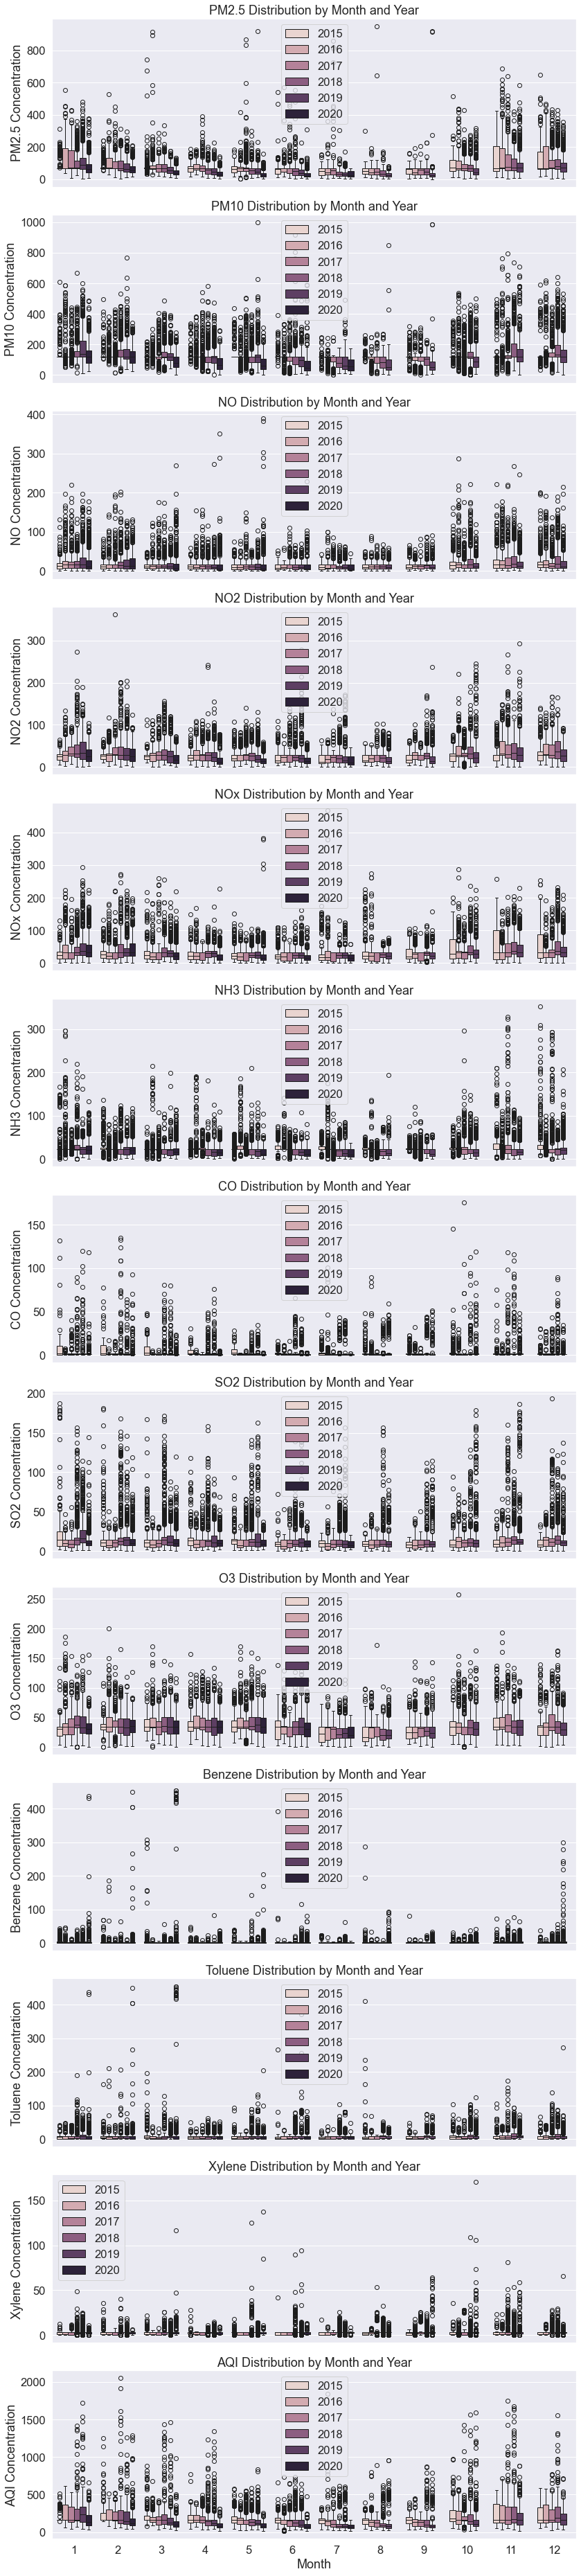

In [218]:
num_plots = len(numeric_cols)
fig, axes = plt.subplots(num_plots, 1, figsize=(12, num_plots * 4), sharex=True)

for i, pollutant in enumerate(numeric_cols):
    sns.boxplot(x='Month', y=pollutant, hue='Year', data=df, ax=axes[i])
    axes[i].set_title(f'{pollutant} Distribution by Month and Year')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel(f'{pollutant} Concentration')
    axes[i].legend() 
plt.tight_layout()
plt.show()


#### Pair plots for Pollutants

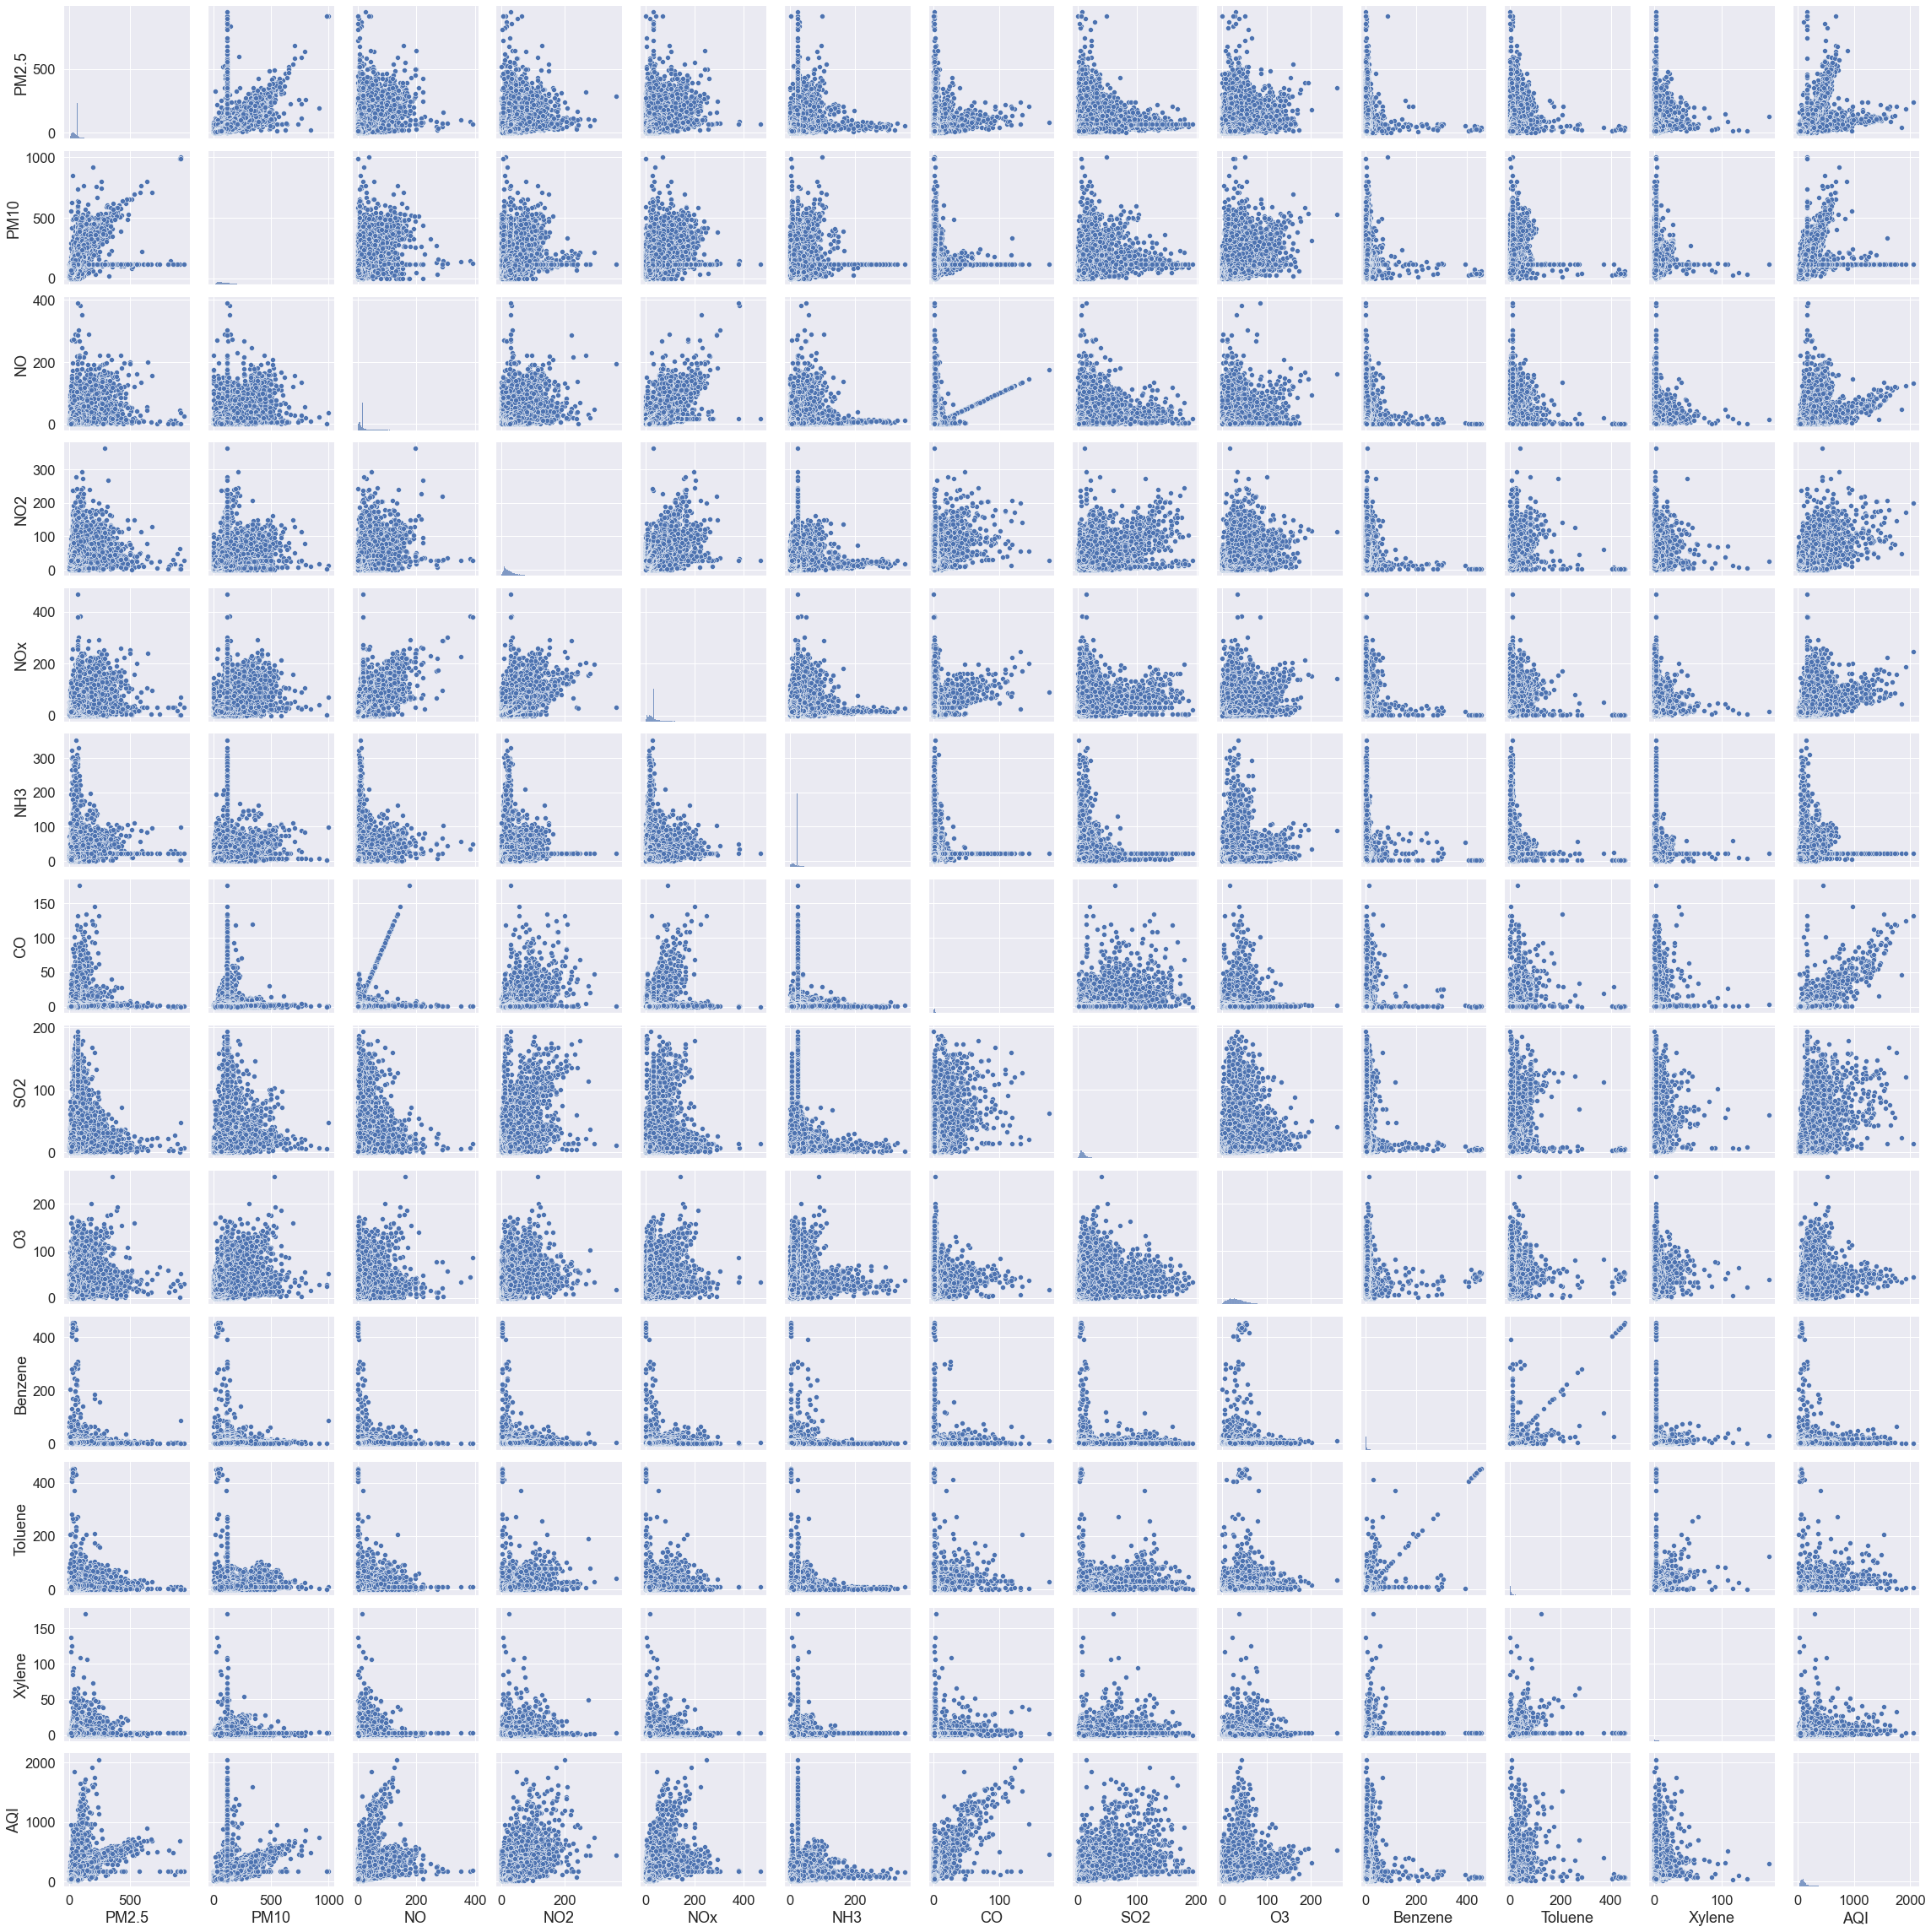

In [219]:
sns.pairplot(df[numeric_cols])
plt.show()

Observe: 

CO Vs AQI    ---  main

some other common observations: similarities - 

Vehicular Pollution content ----- PM2.5, PM10, NO2, NO, NOx, NH3, CO

Industrial Pollution content ---- CO, SO2, O3, Benzene, Toluene, Xylene

#### Vehicular vs Industrial

Here We divided the data set into two parts:

 Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) 
 
 and find how these contents correlated with Air Quality Index (AQI)

In [220]:
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']

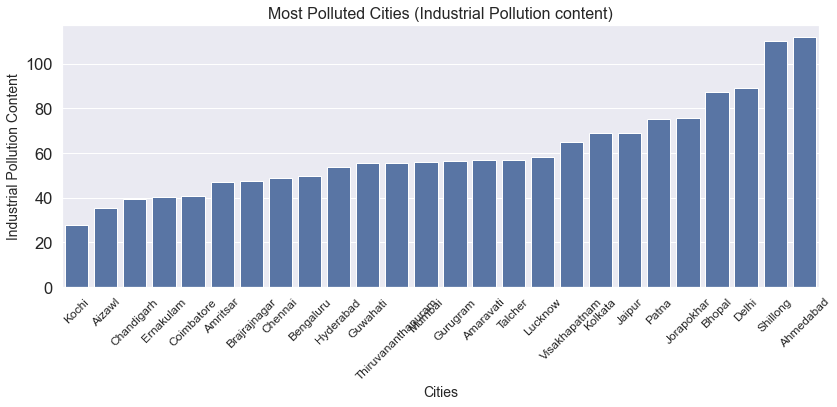

In [221]:

top_industrial_pollution = (
    df[['City', 'Industrial Pollution content']]
    .groupby("City")
    # .median()
    .mean()
    .sort_values(by='Industrial Pollution content', ascending=True)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(x='City',y='Industrial Pollution content',data=top_industrial_pollution)
plt.title('Most Polluted Cities (Industrial Pollution content)', fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Industrial Pollution Content', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()



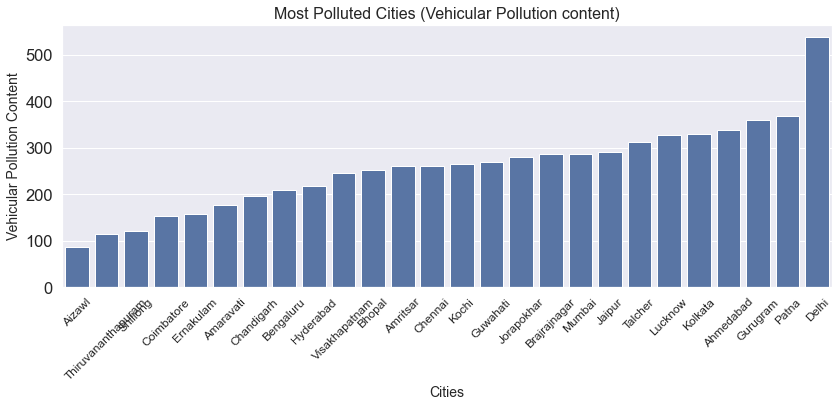

In [222]:
top_vehicular_pollution = (
    df[['City', 'Vehicular Pollution content']]
    .groupby("City")
    # .median()
    .mean()
    .sort_values(by='Vehicular Pollution content', ascending=True)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(x='City',y='Vehicular Pollution content',data=top_vehicular_pollution)
plt.title('Most Polluted Cities (Vehicular Pollution content)', fontsize=16)
plt.xlabel('Cities', fontsize=14)
plt.ylabel('Vehicular Pollution Content', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


#### Satisfaction level of people

In [223]:
df['Air_quality'] = df['Air_quality'].fillna('Unknown')

In [224]:
# Creating individual city data 
ahmedabad_data = df[df['City'] == 'Ahmedabad'][['City', 'Air_quality']]
delhi_data = df[df['City'] == 'Delhi'][['City', 'Air_quality']]
kolkata_data = df[df['City'] == 'Kolkata'][['City', 'Air_quality']]
mumbai_data = df[df['City'] == 'Mumbai'][['City', 'Air_quality']]
bengaluru_data = df[df['City'] == 'Bengaluru'][['City', 'Air_quality']]

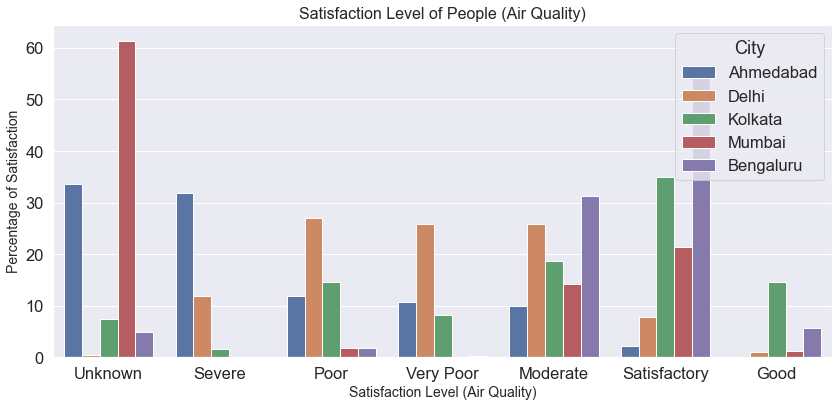

In [225]:
# Calculate percentage distribution of air quality levels for each city
def calculate_percentage_distribution(city_data):
    counts = city_data['Air_quality'].value_counts()
    return (counts / counts.sum() * 100).round(2)

ahmedabad_dist = calculate_percentage_distribution(ahmedabad_data)
delhi_dist = calculate_percentage_distribution(delhi_data)
kolkata_dist = calculate_percentage_distribution(kolkata_data)
mumbai_dist = calculate_percentage_distribution(mumbai_data)
bengaluru_dist = calculate_percentage_distribution(bengaluru_data)

# Combine all cities' data into a single DataFrame
df_row = pd.concat(
    [ahmedabad_dist, delhi_dist, kolkata_dist, mumbai_dist, bengaluru_dist],axis=1,
    keys=['Ahmedabad', 'Delhi', 'Kolkata', 'Mumbai', 'Bengaluru']
)

df_row = df_row.reset_index().rename(columns={'index': 'Air_quality'})
df_melted = df_row.melt(id_vars='Air_quality', var_name='City', value_name='Percentage')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted,x='Air_quality',y='Percentage',hue='City')
plt.title('Satisfaction Level of People (Air Quality)', fontsize=16)
plt.xlabel('Satisfaction Level (Air Quality)', fontsize=14)
plt.ylabel('Percentage of Satisfaction', fontsize=14)
plt.legend(title='City', loc='upper right')
plt.tight_layout()
plt.show()


#### Heat map

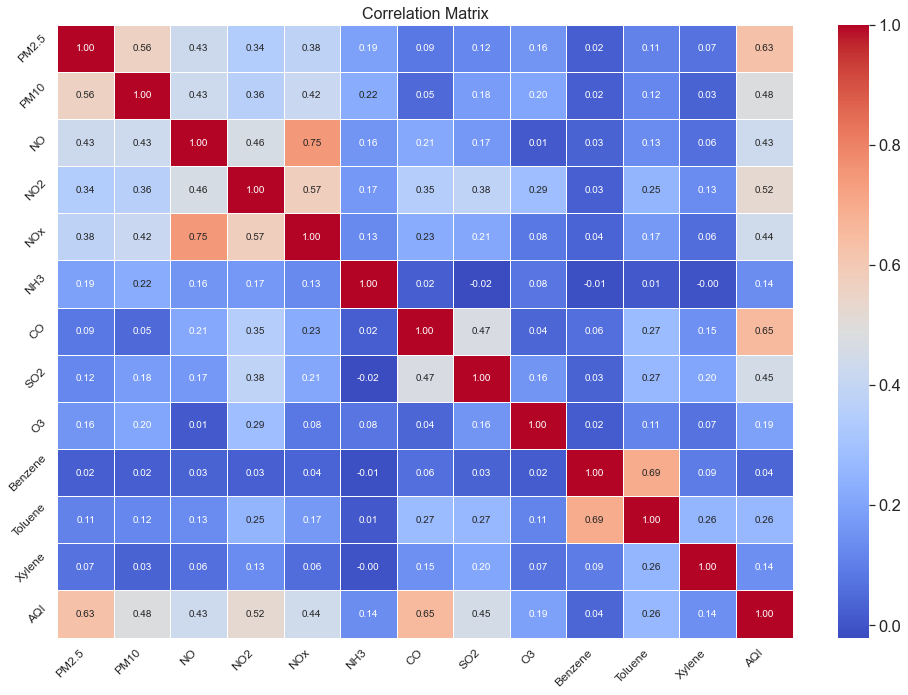

In [226]:
cor = df[numeric_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=45, ha='right', fontsize=12)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()


Same observation as pair plots But detailed numeric proof.

#### CO trends over years

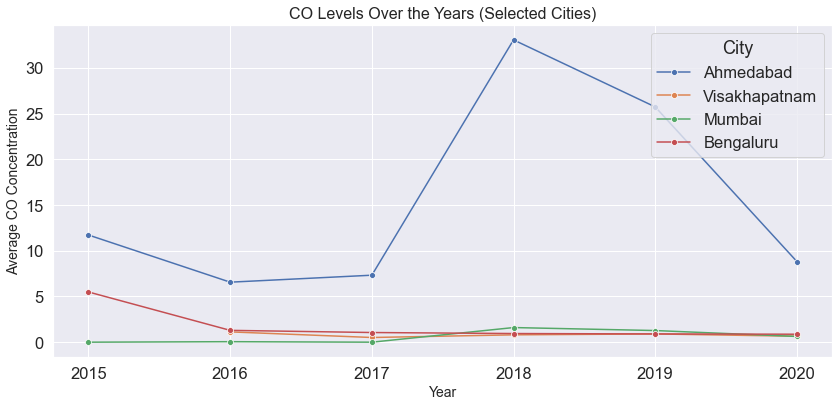

In [227]:
selected_cities = ['Ahmedabad', 'Visakhapatnam', 'Mumbai', 'Bengaluru']

filtered_df = df[df['City'].isin(selected_cities)]

def calculate_co_trend(city_data):
    co_trend = city_data.groupby('Year')['CO'].mean()
    return co_trend

ahmedabad_co_trend = calculate_co_trend(filtered_df[filtered_df['City'] == 'Ahmedabad'])
Visakhapatnam_co_trend = calculate_co_trend(filtered_df[filtered_df['City'] == 'Visakhapatnam'])
mumbai_co_trend = calculate_co_trend(filtered_df[filtered_df['City'] == 'Mumbai'])
bengaluru_co_trend = calculate_co_trend(filtered_df[filtered_df['City'] == 'Bengaluru'])

df_co_trend = pd.concat([ahmedabad_co_trend, Visakhapatnam_co_trend, mumbai_co_trend, bengaluru_co_trend], axis=1,
    keys=['Ahmedabad', 'Visakhapatnam', 'Mumbai', 'Bengaluru']
)

df_co_trend = df_co_trend.reset_index().rename(columns={'index': 'Year'})
df_melted_co = df_co_trend.melt(id_vars='Year', var_name='City', value_name='CO Trend')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted_co, x='Year', y='CO Trend', hue='City', marker='o')
plt.title('CO Levels Over the Years (Selected Cities)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average CO Concentration', fontsize=14)
plt.legend(title='City', loc='upper right')
plt.tight_layout()
plt.show()


#### AQI trends over years

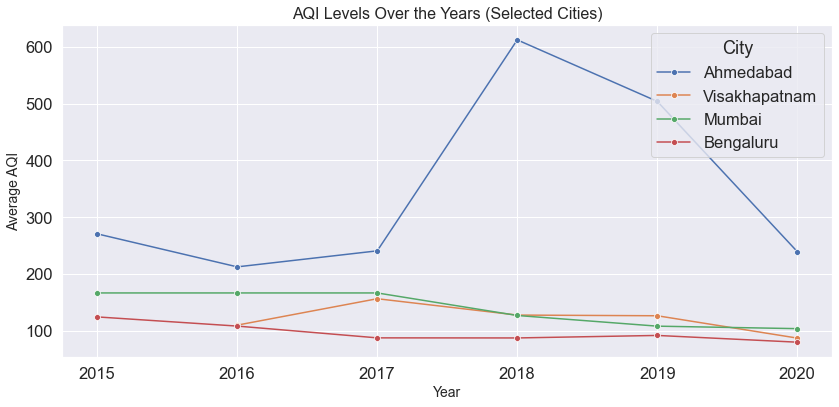

In [228]:
def calculate_aqi_trend(city_data):
    aqi_trend = city_data.groupby('Year')['AQI'].mean()
    return aqi_trend

ahmedabad_aqi_trend = calculate_aqi_trend(filtered_df[filtered_df['City'] == 'Ahmedabad'])
Visakhapatnam_aqi_trend = calculate_aqi_trend(filtered_df[filtered_df['City'] == 'Visakhapatnam'])
mumbai_aqi_trend = calculate_aqi_trend(filtered_df[filtered_df['City'] == 'Mumbai'])
bengaluru_aqi_trend = calculate_aqi_trend(filtered_df[filtered_df['City'] == 'Bengaluru'])


df_aqi_trend = pd.concat([ahmedabad_aqi_trend, Visakhapatnam_aqi_trend, mumbai_aqi_trend, bengaluru_aqi_trend], axis=1,
    keys=['Ahmedabad', 'Visakhapatnam', 'Mumbai', 'Bengaluru']
)

df_aqi_trend = df_aqi_trend.reset_index().rename(columns={'index': 'Year'})
df_melted_aqi = df_aqi_trend.melt(id_vars='Year', var_name='City', value_name='AQI Trend')


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted_aqi, x='Year', y='AQI Trend', hue='City', marker='o')
plt.title('AQI Levels Over the Years (Selected Cities)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average AQI', fontsize=14)
plt.legend(title='City', loc='upper right')
plt.tight_layout()
plt.show()


Observation: except Ahmedabad CO effect is not seen in other cities 

#### Cities having worst levelss of each pollutant

Cities having worst levels of each pollutant:


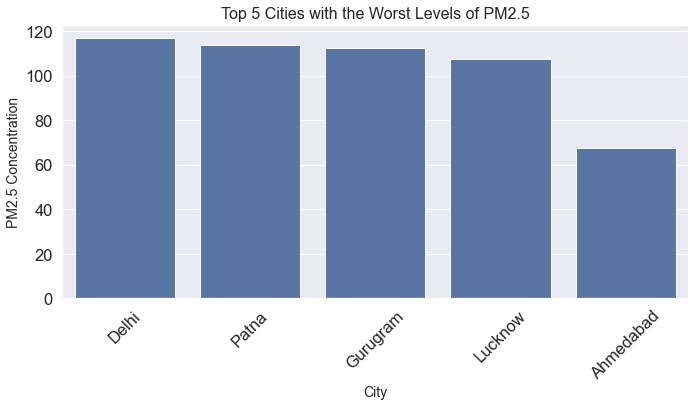

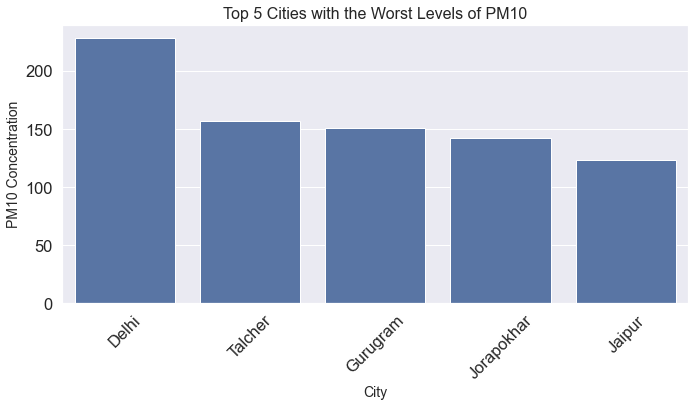

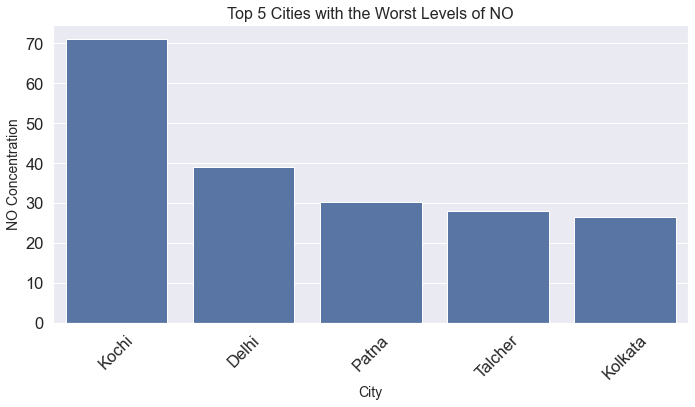

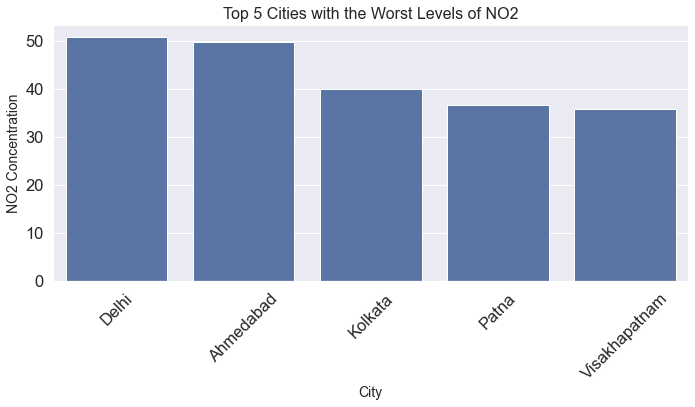

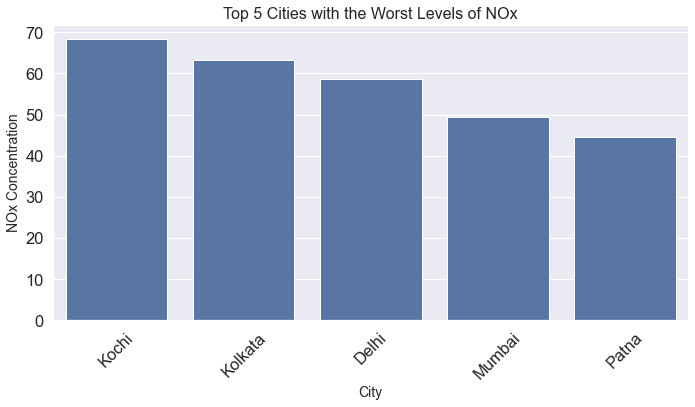

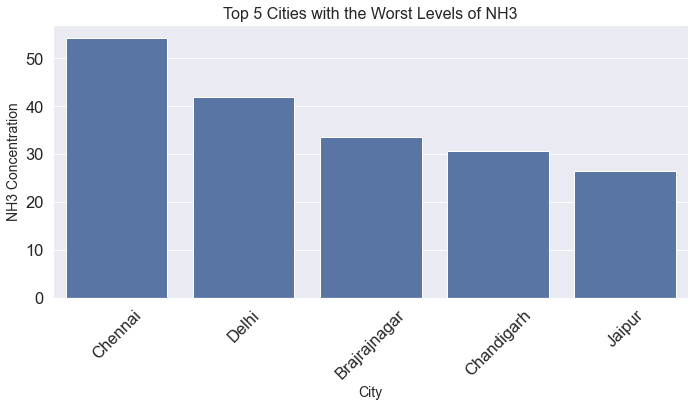

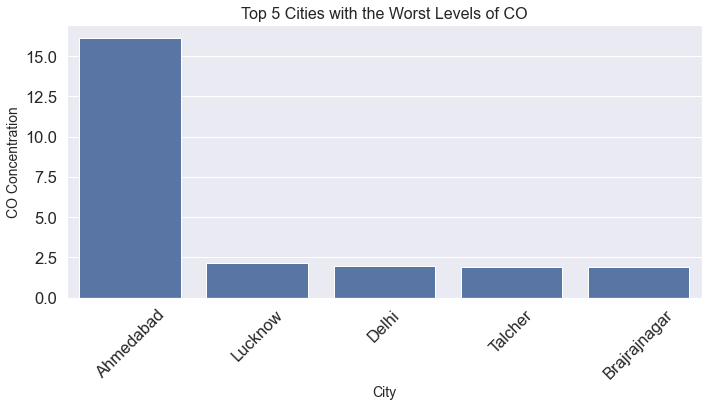

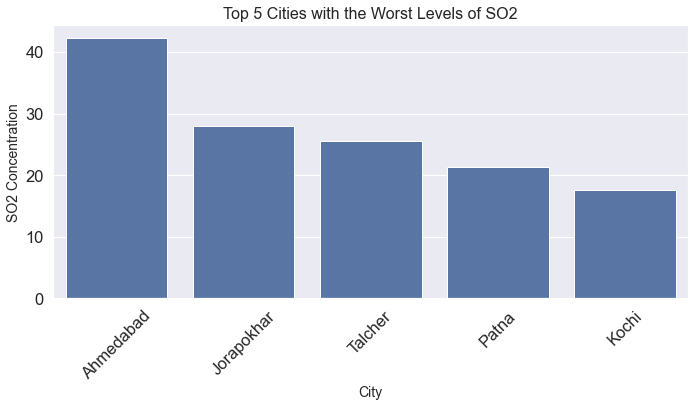

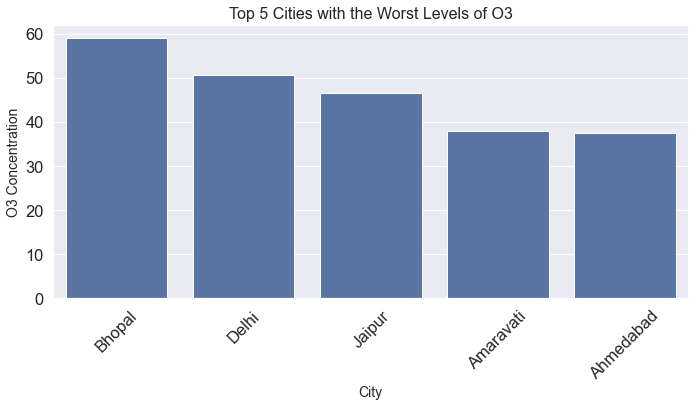

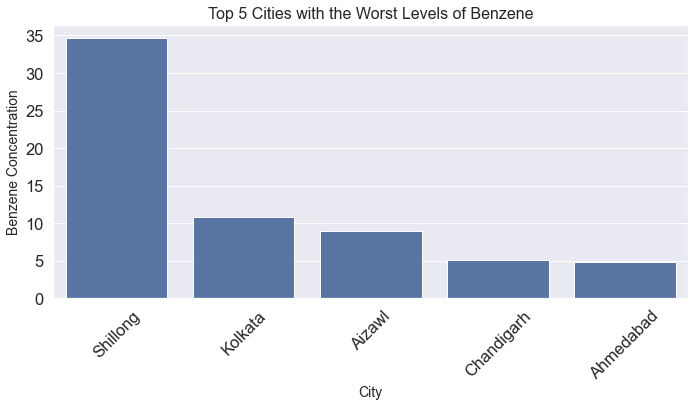

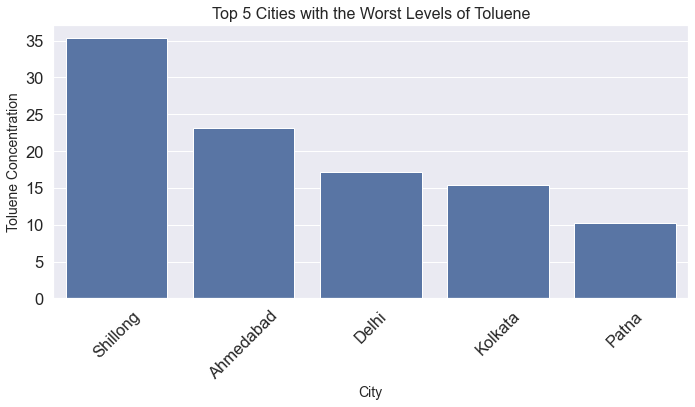

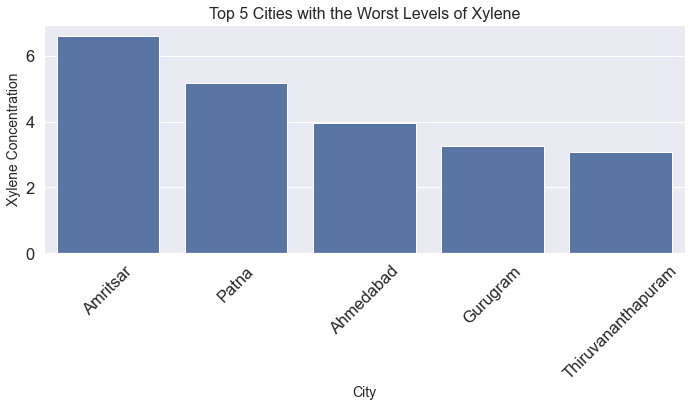

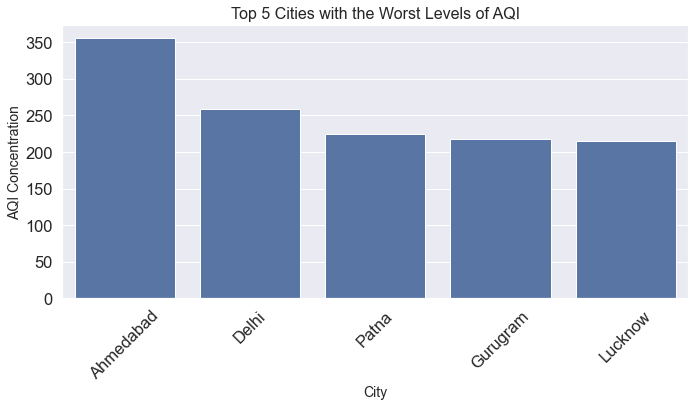

In [229]:
def plot_max_polluted_cities(pollutant):
    table = df[[pollutant, 'City']].groupby('City').mean().sort_values(by=pollutant, ascending=False).reset_index()

    top_cities = table.head(5)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='City', y=pollutant, data=top_cities)

    plt.title(f'Top 5 Cities with the Worst Levels of {pollutant}', fontsize=16)
    plt.xlabel('City', fontsize=14)
    plt.ylabel(f'{pollutant} Concentration', fontsize=14)
    plt.xticks(rotation=45)  
    plt.tight_layout()
    plt.show()

print("Cities having worst levels of each pollutant:")
for pollutant in numeric_cols:
    plot_max_polluted_cities(pollutant)
